In [186]:
import pandas as pd

In [187]:
aggr = pd.read_csv('cluster_aggregates.csv')
aggr.head()

,Unnamed: 0,kmeans_119,moving_time,average_watts,suffer_score,ride_count
0,0,0,5205.500000,179.200000,106.750000,8
1,1,1,2039.454545,94.377273,70.058710,22
2,2,2,7700.100000,133.890000,65.414581,10
3,3,3,7351.071429,128.214286,80.285714,14
4,4,4,9716.500000,94.106200,45.551823,8


In [188]:
aggr.describe()

,Unnamed: 0,kmeans_119,moving_time,average_watts,suffer_score,ride_count
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,59.000000,59.000000,5630.756840,137.419618,68.733863,12.075630
std,34.496377,34.496377,2622.881569,24.594104,21.620434,5.557343
min,0.000000,0.000000,1000.333333,83.276667,9.000000,1.000000
25%,29.500000,29.500000,3816.392857,120.840833,64.993005,8.500000
50%,59.000000,59.000000,5094.750000,139.958333,65.414581,11.000000
75%,88.500000,88.500000,7260.735714,153.488095,74.312500,14.000000
max,118.000000,118.000000,15246.500000,194.087500,134.111111,33.000000


In [189]:
pre_train = aggr[['moving_time', 'ride_count']]
pre_train.head()

,moving_time,ride_count
0,5205.500000,8
1,2039.454545,22
2,7700.100000,10
3,7351.071429,14
4,9716.500000,8


In [190]:
mean_avg_watts = aggr['average_watts'].mean()
mean_suffer_score = aggr['suffer_score'].mean()
pre_train.loc[:, 'average_watts'] = aggr['average_watts'].apply(lambda x : 1 if x >= mean_avg_watts else 0)
pre_train.loc[:, 'suffer_score'] = aggr['suffer_score'].apply(lambda x : 1 if x >= mean_suffer_score else 0)
pre_train.describe()

/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_24727/9803172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_train.loc[:, 'average_watts'] = aggr['average_watts'].apply(lambda x : 1 if x >= mean_avg_watts else 0)
/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_24727/9803172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_train.loc[:, 'suffer_score'] = aggr['suffer_score'].apply(lambda x : 1 if x >= mean_suffer_score else 0)


,moving_time,ride_count,average_watts,suffer_score
count,119.000000,119.000000,119.000000,119.000000
mean,5630.756840,12.075630,0.512605,0.310924
std,2622.881569,5.557343,0.501955,0.464829
min,1000.333333,1.000000,0.000000,0.000000
25%,3816.392857,8.500000,0.000000,0.000000
50%,5094.750000,11.000000,1.000000,0.000000
75%,7260.735714,14.000000,1.000000,1.000000
max,15246.500000,33.000000,1.000000,1.000000


In [191]:
pre_train.head()
pre_train.to_csv('pre_classification_pre_plan.csv')

In [192]:
pre_train_plan = pre_train[['moving_time', 'ride_count']]
pre_train_plan.loc[:, 'training_plan'] = pre_train['average_watts'].astype(str).str.cat(pre_train['suffer_score'].astype(str), sep='_')
pre_train_plan.to_csv('pre_classification.csv')
pre_train_plan.head()

/var/folders/ph/n1bcmp_s2rlgrd9vg896nks80000gn/T/ipykernel_24727/4034469462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_train_plan.loc[:, 'training_plan'] = pre_train['average_watts'].astype(str).str.cat(pre_train['suffer_score'].astype(str), sep='_')


,moving_time,ride_count,training_plan
0,5205.500000,8,1_1
1,2039.454545,22,0_1
2,7700.100000,10,0_0
3,7351.071429,14,0_1
4,9716.500000,8,0_0


In [193]:
pre_train_plan.describe(include='all')

,moving_time,ride_count,training_plan
count,119.000000,119.000000,119
unique,NaN,NaN,4
top,NaN,NaN,0_0
freq,NaN,NaN,47
mean,5630.756840,12.075630,NaN
std,2622.881569,5.557343,NaN
min,1000.333333,1.000000,NaN
25%,3816.392857,8.500000,NaN
50%,5094.750000,11.000000,NaN
75%,7260.735714,14.000000,NaN


In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def train_test_classifiers(X_train, X_test, y_train, y_test, plot=False):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }

    classifier_names = []
    accuracies = []

    # Train and test each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        # Evaluate the classifier
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='micro')

        # Display results
        print(f"\nClassifier: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")

        classifier_names.append(name)
        accuracies.append(accuracy)
    
    if plot:
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(classifier_names, accuracies, color='skyblue')
        plt.xlabel('Classifier')
        plt.ylabel('Accuracy')
        plt.title('Classifier Accuracies')
        plt.ylim([0, .7])  # Set y-axis limit to the range [0, 1]
        plt.savefig('visuals/classifier_accuracies.png')
        plt.show()

In [195]:
# Assuming 'training_plan' is your target variable
X = pre_train_plan[['moving_time', 'ride_count']]
y = pre_train_plan['training_plan']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Classifier: Logistic Regression
Accuracy: 0.5278
F1 Score: 0.5278

Classifier: Decision Tree
Accuracy: 0.5000
F1 Score: 0.5000

Classifier: Random Forest
Accuracy: 0.4167
F1 Score: 0.4167

Classifier: Support Vector Machine
Accuracy: 0.5833
F1 Score: 0.5833

Classifier: K-Nearest Neighbors
Accuracy: 0.3333
F1 Score: 0.3333


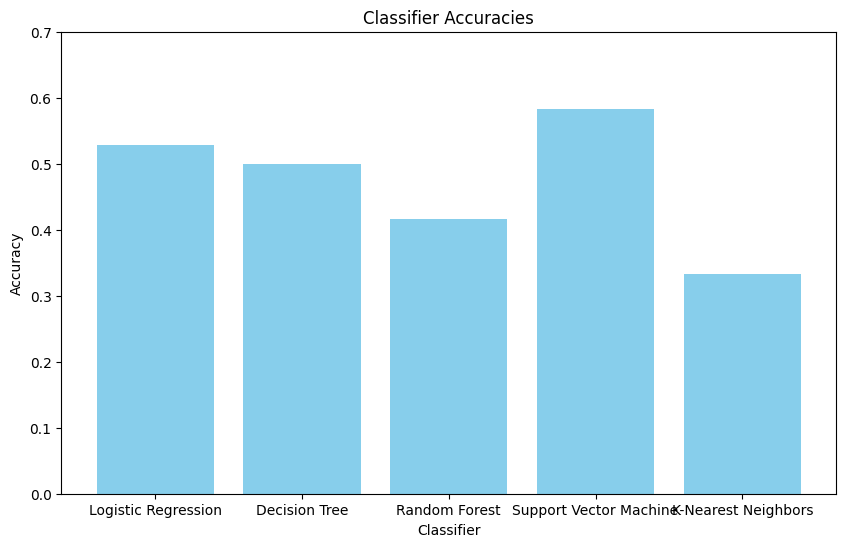

In [196]:
train_test_classifiers(X_train, X_test, y_train, y_test, plot=True)

In [197]:
pre_train_plan['training_plan'].value_counts()

training_plan
0_0    47
1_0    35
1_1    26
0_1    11
Name: count, dtype: int64

In [198]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled

(      moving_time  ride_count
 0    10350.250000          16
 1     6602.000000          12
 2     4105.950000          20
 3     4944.083333          12
 4     3525.333333           9
 ..            ...         ...
 123   8113.038889           8
 124   5680.523584          12
 125   3789.332627          10
 126   4184.192126          12
 127   5722.533621          13
 
 [128 rows x 2 columns],
 0      1_0
 1      0_0
 2      0_0
 3      1_0
 4      1_1
       ... 
 123    1_1
 124    1_1
 125    1_1
 126    1_1
 127    1_1
 Name: training_plan, Length: 128, dtype: object)

In [199]:
train_test_classifiers(X_train_resampled, X_test, y_train_resampled, y_test)


Classifier: Logistic Regression
Accuracy: 0.3889
F1 Score: 0.3889

Classifier: Decision Tree
Accuracy: 0.4444
F1 Score: 0.4444

Classifier: Random Forest
Accuracy: 0.4444
F1 Score: 0.4444

Classifier: Support Vector Machine
Accuracy: 0.4167
F1 Score: 0.4167

Classifier: K-Nearest Neighbors
Accuracy: 0.3611
F1 Score: 0.3611


In [200]:
import numpy as np

# Data Augmentation
augmented_data = pd.DataFrame()

# Define augmentation parameters
num_augmented_samples = 5  # Number of augmented samples per original sample

training_data = pd.concat([X_train, y_train], axis=1)

for index, row in training_data.iterrows():
    # Repeat the original row along with variations
    augmented_rows = pd.concat([pd.Series(row)] * num_augmented_samples, axis=1).T

    # Add noise or variation to the augmented rows
    # You can customize this based on your specific requirements
    augmented_rows['moving_time'] += np.random.normal(scale=0.1, size=num_augmented_samples)
    augmented_rows['ride_count'] += np.random.randint(-1, 2, size=num_augmented_samples)

    # Append the augmented rows to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_rows])

# Display the augmented data
print("\nAugmented Data:")
augmented_data


Augmented Data:


,moving_time,ride_count,training_plan
62,10350.193303,17,1_0
62,10350.307874,17,1_0
62,10350.368089,17,1_0
62,10350.066999,17,1_0
62,10350.422338,15,1_0
...,...,...,...
102,5014.786643,24,1_0
102,5014.882718,24,1_0
102,5014.932085,25,1_0
102,5014.977769,24,1_0


In [201]:
X_train_aug = augmented_data[['moving_time', 'ride_count']]
y_train_aug = augmented_data['training_plan']
X_train_aug, y_train_aug

(      moving_time ride_count
 62   10350.193303         17
 62   10350.307874         17
 62   10350.368089         17
 62   10350.066999         17
 62   10350.422338         15
 ..            ...        ...
 102   5014.786643         24
 102   5014.882718         24
 102   5014.932085         25
 102   5014.977769         24
 102   5014.800087         23
 
 [415 rows x 2 columns],
 62     1_0
 62     1_0
 62     1_0
 62     1_0
 62     1_0
       ... 
 102    1_0
 102    1_0
 102    1_0
 102    1_0
 102    1_0
 Name: training_plan, Length: 415, dtype: object)

In [202]:
train_test_classifiers(X_train_aug, X_test, y_train_aug, y_test)


Classifier: Logistic Regression
Accuracy: 0.5278
F1 Score: 0.5278

Classifier: Decision Tree
Accuracy: 0.5000
F1 Score: 0.5000

Classifier: Random Forest
Accuracy: 0.4444
F1 Score: 0.4444

Classifier: Support Vector Machine
Accuracy: 0.5278
F1 Score: 0.5278

Classifier: K-Nearest Neighbors
Accuracy: 0.4167
F1 Score: 0.4167


In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Iterate through each classifier
for name, classifier in classifiers:
    # Create a pipeline with a standard scaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Print the cross-validation scores
    print(f'{name} - Cross Validation Scores:', cv_scores)
    print(f'Mean Accuracy: {np.mean(cv_scores)}\n')

    # Train the model on the entire training set
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the performance on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy on Test Set:', accuracy)
    print('\n' + '='*30 + '\n')


Logistic Regression - Cross Validation Scores: [0.41176471 0.47058824 0.41176471 0.375      0.5625    ]
Mean Accuracy: 0.4463235294117647

Logistic Regression - Accuracy on Test Set: 0.5277777777777778


Decision Tree - Cross Validation Scores: [0.41176471 0.41176471 0.47058824 0.3125     0.4375    ]
Mean Accuracy: 0.4088235294117647

Decision Tree - Accuracy on Test Set: 0.5


Random Forest - Cross Validation Scores: [0.52941176 0.41176471 0.35294118 0.25       0.4375    ]
Mean Accuracy: 0.39632352941176474

Random Forest - Accuracy on Test Set: 0.4444444444444444


Support Vector Machine - Cross Validation Scores: [0.58823529 0.47058824 0.41176471 0.3125     0.4375    ]
Mean Accuracy: 0.44411764705882356

Support Vector Machine - Accuracy on Test Set: 0.5833333333333334


K-Nearest Neighbors - Cross Validation Scores: [0.41176471 0.41176471 0.41176471 0.3125     0.375     ]
Mean Accuracy: 0.3845588235294118

K-Nearest Neighbors - Accuracy on Test Set: 0.3333333333333333


